In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_1 = pd.read_csv('incident_event_log.csv')
pd.set_option('display.max_column', None)
df_1

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,?,?,Updated by 27,16/2/2017 09:53,Email,Location 204,Category 42,Subcategory 223,Symptom 494,?,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,?,?,Updated by 908,16/2/2017 14:17,Email,Location 204,Category 42,Subcategory 223,Symptom 494,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 10,False,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,?,?,Updated by 60,16/2/2017 15:20,Email,Location 204,Category 42,Subcategory 223,Symptom 494,?,2 - Medium,2 - Medium,3 - Moderate,Group 31,?,False,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,?,?,Updated by 27,16/2/2017 16:38,Email,Location 204,Category 42,Subcategory 223,Symptom 494,?,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [3]:
df_1.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [5]:
df_1[df_1.duplicated()].shape

(0, 36)

In [6]:
variable=['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at']

for variable in df_1:
    print ('\nFrequency of Categories for varible %s'%variable)
    print (df_1[variable].unique())


Frequency of Categories for varible number
['INC0000045' 'INC0000047' 'INC0000057' ... 'INC0120495' 'INC0120835'
 'INC0121064']

Frequency of Categories for varible incident_state
['New' 'Resolved' 'Closed' 'Active' 'Awaiting User Info'
 'Awaiting Problem' 'Awaiting Vendor' 'Awaiting Evidence' '-100']

Frequency of Categories for varible active
[ True False]

Frequency of Categories for varible reassignment_count
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]

Frequency of Categories for varible reopen_count
[0 1 2 3 4 5 6 7 8]

Frequency of Categories for varible sys_mod_count
[  0   2   3   4   1   5   6   7   8   9  10  11  12  13  18  19  14  15
  16  17  20  21  22  23  26  28  30  31  32  33  34  91  92  93  99 101
 102  44  45  60  61  62 105 106  24  43  49  50  51  25  27  29  41  42
  40  39  46  47  48  53  55  56  57  59  58  65  66  67  38 119 128 129
  64  73  74  77  83  89  90  75  35  70  71  52 115 116  54  36  37  88
  87  94 


Frequency of Categories for varible sys_updated_by
['Updated by 21' 'Updated by 642' 'Updated by 804' 'Updated by 908'
 'Updated by 746' 'Updated by 703' 'Updated by 332' 'Updated by 451'
 'Updated by 340' 'Updated by 465' 'Updated by 241' 'Updated by 60'
 'Updated by 265' 'Updated by 723' 'Updated by 307' 'Updated by 967'
 'Updated by 798' 'Updated by 653' 'Updated by 750' 'Updated by 164'
 'Updated by 862' 'Updated by 874' 'Updated by 88' 'Updated by 928'
 'Updated by 336' 'Updated by 135' 'Updated by 974' 'Updated by 713'
 'Updated by 199' 'Updated by 664' 'Updated by 578' 'Updated by 111'
 'Updated by 310' 'Updated by 402' 'Updated by 789' 'Updated by 15'
 'Updated by 429' 'Updated by 727' 'Updated by 259' 'Updated by 507'
 'Updated by 277' 'Updated by 213' 'Updated by 833' 'Updated by 868'
 'Updated by 681' 'Updated by 419' 'Updated by 608' 'Updated by 614'
 'Updated by 881' 'Updated by 344' 'Updated by 994' 'Updated by 133'
 'Updated by 755' 'Updated by 533' 'Updated by 939' 'Up

 'Symptom 447' 'Symptom 103' 'Symptom 204' 'Symptom 565' 'Symptom 302']

Frequency of Categories for varible cmdb_ci
['?' 'cmdb_ci 31' 'cmdb_ci 23' 'cmdb_ci 22' 'cmdb_ci 6' 'cmdb_ci 3'
 'cmdb_ci 49' 'cmdb_ci 15' 'cmdb_ci 16' 'cmdb_ci 19' 'cmdb_ci 48'
 'cmdb_ci 14' 'cmdb_ci 28' 'cmdb_ci 21' 'cmdb_ci 11' 'cmdb_ci 10'
 'cmdb_ci 2' 'cmdb_ci 7' 'cmdb_ci 5' 'cmdb_ci 12' 'cmdb_ci 35'
 'cmdb_ci 26' 'cmdb_ci 53' 'cmdb_ci 4' 'cmdb_ci 17' 'cmdb_ci 51'
 'cmdb_ci 33' 'cmdb_ci 36' 'cmdb_ci 13' 'cmdb_ci 27' 'cmdb_ci 8'
 'cmdb_ci 9' 'cmdb_ci 42' 'cmdb_ci 39' 'cmdb_ci 34' 'cmdb_ci 24'
 'cmdb_ci 46' 'cmdb_ci 47' 'cmdb_ci 41' 'cmdb_ci 38' 'cmdb_ci 20'
 'cmdb_ci 50' 'cmdb_ci 40' 'cmdb_ci 18' 'cmdb_ci 37' 'cmdb_ci 45'
 'cmdb_ci 32' 'cmdb_ci 43' 'cmdb_ci 29' 'cmdb_ci 30' 'cmdb_ci 25']

Frequency of Categories for varible impact
['2 - Medium' '1 - High' '3 - Low']

Frequency of Categories for varible urgency
['2 - Medium' '3 - Low' '1 - High']

Frequency of Categories for varible priority
['3 - Moderate' '2 

['?' 'code 8s' 'Vendor 3' 'Vendor 2' 'Vendor 1']

Frequency of Categories for varible caused_by
['?' 'CHG0000132' 'CHG0000097' 'CHG0001327']

Frequency of Categories for varible closed_code
['code 5' 'code 10' 'code 3' 'code 7' 'code 6' 'code 1' 'code 11' 'code 8'
 'code 4' 'code 9' 'code 2' 'code 17' 'code 16' '?' 'code 15' 'code 13'
 'code 14' 'code 12']

Frequency of Categories for varible resolved_by
['Resolved by 149' 'Resolved by 81' 'Resolved by 5' 'Resolved by 113'
 'Resolved by 62' 'Resolved by 71' 'Resolved by 197' 'Resolved by 208'
 'Resolved by 215' 'Resolved by 30' 'Resolved by 227' 'Resolved by 158'
 'Resolved by 85' 'Resolved by 163' 'Resolved by 15' 'Resolved by 99'
 'Resolved by 66' 'Resolved by 184' 'Resolved by 183' 'Resolved by 77'
 'Resolved by 196' 'Resolved by 206' 'Resolved by 174' 'Resolved by 106'
 'Resolved by 139' 'Resolved by 143' 'Resolved by 153' 'Resolved by 89'
 'Resolved by 231' 'Resolved by 180' 'Resolved by 121' 'Resolved by 32'
 'Resolved by 21' 'Re

In [7]:
df_2 = df_1.replace(to_replace ="?",value = np.nan)
df_2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [8]:
df_2.isnull().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

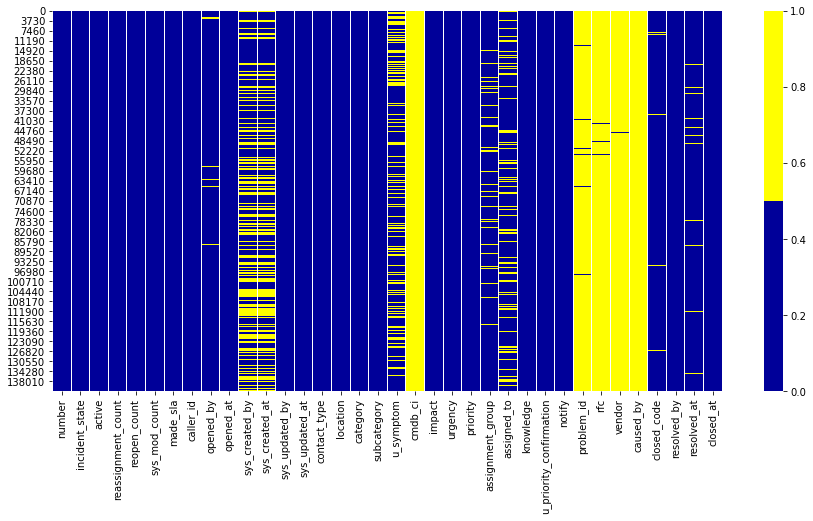

In [9]:
plt.figure(figsize=(15,7))
cols = df_2.columns 
colours = ['#000099', '#ffff00']
sns.heatmap(df_2[cols].isnull(),
            cmap=sns.color_palette(colours));

In [10]:
df_2 = df_2.drop(['cmdb_ci','problem_id','rfc','vendor','caused_by'],axis = 1)
df_2.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'impact', 'urgency', 'priority', 'assignment_group',
       'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify',
       'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [11]:
x = ['incident_state','active','made_sla','contact_type','reopen_count','impact','urgency','priority','knowledge','u_priority_confirmation','notify','closed_code']
print(x)

['incident_state', 'active', 'made_sla', 'contact_type', 'reopen_count', 'impact', 'urgency', 'priority', 'knowledge', 'u_priority_confirmation', 'notify', 'closed_code']


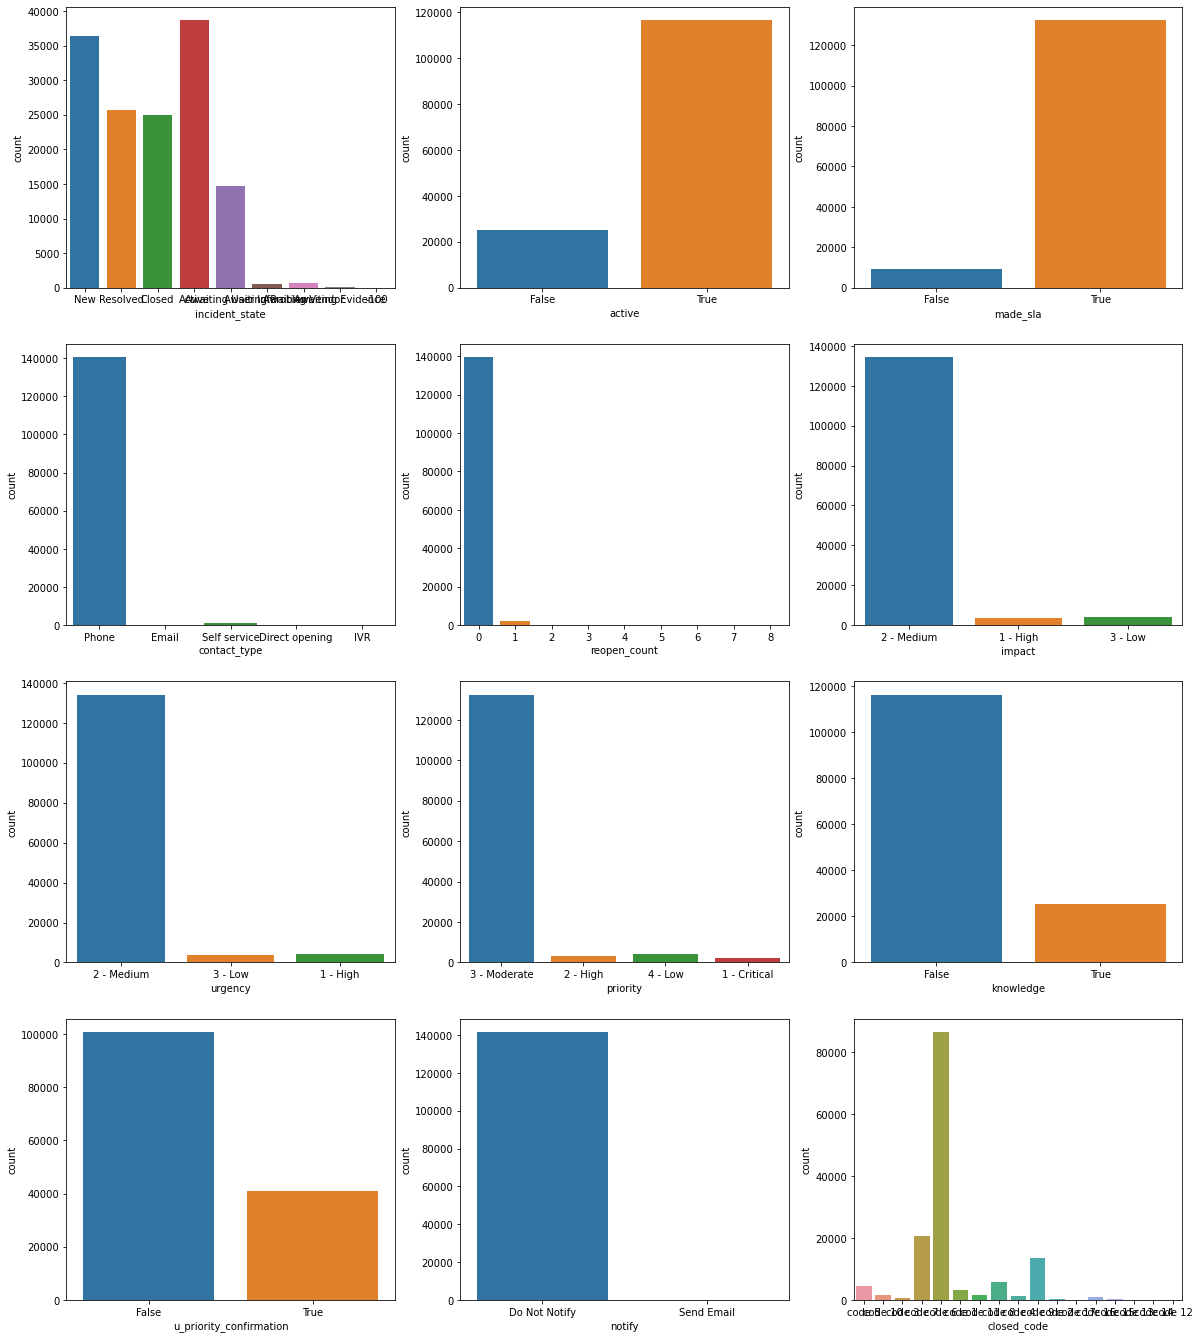

In [12]:
plt.figure(figsize= (20, 30))
for i in enumerate(x):
    plt.subplot(5, 3, i[0] +1)
    sns.countplot(i[1], data= df_2)

In [13]:
# value count
value_count = ['incident_state','active','made_sla','contact_type','reopen_count','impact','urgency','priority','knowledge','u_priority_confirmation','notify','closed_code']
list(value_count)

['incident_state',
 'active',
 'made_sla',
 'contact_type',
 'reopen_count',
 'impact',
 'urgency',
 'priority',
 'knowledge',
 'u_priority_confirmation',
 'notify',
 'closed_code']

In [14]:
for i in value_count:
    print ('\nFrequency of Categories for varible %s'%i)
    print (df_2[i].value_counts())


Frequency of Categories for varible incident_state
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

Frequency of Categories for varible active
True     116726
False     24986
Name: active, dtype: int64

Frequency of Categories for varible made_sla
True     132497
False      9215
Name: made_sla, dtype: int64

Frequency of Categories for varible contact_type
Phone             140462
Self service         995
Email                220
IVR                   18
Direct opening        17
Name: contact_type, dtype: int64

Frequency of Categories for varible reopen_count
0    139398
1      1918
2       190
3       107
4        48
5        24
6        18
7         5
8         4
Name: reopen_count, dtype: int64

Frequency of Categories for varible impact
2 - Medi

In [15]:
df_2 = df_2.drop(['contact_type','reopen_count', 'notify'], axis=1)
df_2.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'opened_at',
       'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at',
       'location', 'category', 'subcategory', 'u_symptom', 'impact', 'urgency',
       'priority', 'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'closed_code', 'resolved_by', 'resolved_at',
       'closed_at'],
      dtype='object')

In [16]:
df_2['opened_at'] = pd.to_datetime(df_2['opened_at'], errors='coerce')
df_2['sys_created_at'] = pd.to_datetime(df_2['sys_created_at'], errors='coerce')
df_2['resolved_at'] = pd.to_datetime(df_2['resolved_at'], errors='coerce')
df_2['closed_at'] = pd.to_datetime(df_2['closed_at'], errors='coerce')
df_2['sys_updated_at'] = pd.to_datetime(df_2['sys_updated_at'], errors='coerce')

In [17]:
df_2['active'] = pd.get_dummies(df_2['active'])
df_2['made_sla'] = pd.get_dummies(df_2['made_sla'])
df_2['knowledge'] = pd.get_dummies(df_2['knowledge'])
df_2['u_priority_confirmation'] = pd.get_dummies(df_2['u_priority_confirmation'])

In [18]:
df_2 = df_2.drop('number', axis=1)

In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   incident_state           141712 non-null  object        
 1   active                   141712 non-null  uint8         
 2   reassignment_count       141712 non-null  int64         
 3   sys_mod_count            141712 non-null  int64         
 4   made_sla                 141712 non-null  uint8         
 5   caller_id                141683 non-null  object        
 6   opened_by                136877 non-null  object        
 7   opened_at                141712 non-null  datetime64[ns]
 8   sys_created_by           88636 non-null   object        
 9   sys_created_at           88636 non-null   datetime64[ns]
 10  sys_updated_by           141712 non-null  object        
 11  sys_updated_at           141712 non-null  datetime64[ns]
 12  location        

In [20]:
df_2["caller_id"]=df_2["caller_id"].str.replace('Caller', '')
df_2["opened_by"]=df_2["opened_by"].str.replace('Opened by', '')
df_2["sys_created_by"]=df_2["sys_created_by"].str.replace('Created by', '')
df_2["sys_updated_by"]=df_2["sys_updated_by"].str.replace('Updated by', '')
df_2["location"]=df_2["location"].str.replace('Location', '')
df_2["category"]=df_2["category"].str.replace('Category', '')
df_2["subcategory"]=df_2["subcategory"].str.replace('Subcategory', '')
df_2["u_symptom"]=df_2["u_symptom"].str.replace('Symptom', '')
df_2["assignment_group"]=df_2["assignment_group"].str.replace('Group', '')
df_2["impact"]=df_2["impact"].apply(lambda x: int(x.split(' ')[0]))
df_2["urgency"]=df_2["urgency"].apply(lambda x: int(x.split(' ')[0]))
df_2["priority"]=df_2["priority"].apply(lambda x: int(x.split(' ')[0]))
df_2["closed_code"]=df_2["closed_code"].str.replace('code', '')
df_2["resolved_by"]=df_2["resolved_by"].str.replace('Resolved by', '')

In [21]:
df_2.head(10)

,incident_state,active,reassignment_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at
0,New,0,0,0,0,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,21,2016-02-29 01:23:00,143,55,170,72,2,2,3,56,NaN,0,1,5,149,2016-02-29 11:29:00,2016-05-03 12:00:00
1,Resolved,0,0,2,0,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,642,2016-02-29 08:53:00,143,55,170,72,2,2,3,56,NaN,0,1,5,149,2016-02-29 11:29:00,2016-05-03 12:00:00
2,Resolved,0,0,3,0,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,804,2016-02-29 11:29:00,143,55,170,72,2,2,3,56,NaN,0,1,5,149,2016-02-29 11:29:00,2016-05-03 12:00:00
3,Closed,1,0,4,0,2403,8,2016-02-29 01:16:00,6,2016-02-29 01:23:00,908,2016-05-03 12:00:00,143,55,170,72,2,2,3,56,NaN,0,1,5,149,2016-02-29 11:29:00,2016-05-03 12:00:00
4,New,0,0,0,0,2403,397,2016-02-29 04:40:00,171,2016-02-29 04:57:00,746,2016-02-29 04:57:00,165,40,215,471,2,2,3,70,Resolver 89,0,1,5,81,2016-01-03 09:52:00,2016-06-03 10:00:00
5,Active,0,1,1,0,2403,397,2016-02-29 04:40:00,171,2016-02-29 04:57:00,21,2016-02-29 05:30:00,165,40,215,471,2,2,3,24,Resolver 31,0,1,5,81,2016-01-03 09:52:00,2016-06-03 10:00:00
6,Active,0,1,2,0,2403,397,2016-02-29 04:40:00,171,2016-02-29 04:57:00,21,2016-02-29 05:33:00,165,40,215,471,2,2,3,24,Resolver 31,0,1,5,81,2016-01-03 09:52:00,2016-06-03 10:00:00
7,Active,0,1,3,0,2403,397,2016-02-29 04:40:00,171,2016-02-29 04:57:00,804,2016-02-29 11:31:00,165,40,215,471,2,2,3,24,Resolver 31,0,1,5,81,2016-01-03 09:52:00,2016-06-03 10:00:00
8,Active,0,1,4,0,2403,397,2016-02-29 04:40:00,171,2016-02-29 04:57:00,703,2016-02-29 11:32:00,165,40,215,471,2,2,3,24,Resolver 31,0,1,5,81,2016-01-03 09:52:00,2016-06-03 10:00:00
9,Active,0,1,5,0,2403,397,2016-02-29 04:40:00,171,2016-02-29 04:57:00,332,2016-01-03 09:14:00,165,40,215,471,2,2,3,24,Resolver 31,0,1,5,81,2016-01-03 09:52:00,2016-06-03 10:00:00


In [22]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   incident_state           141712 non-null  object        
 1   active                   141712 non-null  uint8         
 2   reassignment_count       141712 non-null  int64         
 3   sys_mod_count            141712 non-null  int64         
 4   made_sla                 141712 non-null  uint8         
 5   caller_id                141683 non-null  object        
 6   opened_by                136877 non-null  object        
 7   opened_at                141712 non-null  datetime64[ns]
 8   sys_created_by           88636 non-null   object        
 9   sys_created_at           88636 non-null   datetime64[ns]
 10  sys_updated_by           141712 non-null  object        
 11  sys_updated_at           141712 non-null  datetime64[ns]
 12  location        

In [23]:
df_2.isnull().sum()

incident_state                 0
active                         0
reassignment_count             0
sys_mod_count                  0
made_sla                       0
caller_id                     29
opened_by                   4835
opened_at                      0
sys_created_by             53076
sys_created_at             53076
sys_updated_by                 0
sys_updated_at                 0
location                      76
category                      78
subcategory                  111
u_symptom                  32964
impact                         0
urgency                        0
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
closed_code                  714
resolved_by                  226
resolved_at                 3141
closed_at                      0
dtype: int64

In [24]:
df_2 = df_2.drop(['opened_by','sys_created_by','assigned_to'], axis=1)

In [25]:
df_2.shape

(141712, 24)

In [26]:
df_2['opened_at'] = df_2['opened_at'].dt.minute
df_2['sys_created_at'] = df_2['sys_created_at'].dt.minute
df_2['sys_updated_at'] = df_2['sys_updated_at'].dt.minute
df_2['resolved_at'] = df_2['resolved_at'].dt.minute
df_2['closed_at'] = df_2['closed_at'].dt.minute

In [27]:
df_2.head(10)

,incident_state,active,reassignment_count,sys_mod_count,made_sla,caller_id,opened_at,sys_created_at,sys_updated_by,sys_updated_at,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at
0,New,0,0,0,0,2403,16,23.0,21,23,143,55,170,72,2,2,3,56,0,1,5,149,29.0,0
1,Resolved,0,0,2,0,2403,16,23.0,642,53,143,55,170,72,2,2,3,56,0,1,5,149,29.0,0
2,Resolved,0,0,3,0,2403,16,23.0,804,29,143,55,170,72,2,2,3,56,0,1,5,149,29.0,0
3,Closed,1,0,4,0,2403,16,23.0,908,0,143,55,170,72,2,2,3,56,0,1,5,149,29.0,0
4,New,0,0,0,0,2403,40,57.0,746,57,165,40,215,471,2,2,3,70,0,1,5,81,52.0,0
5,Active,0,1,1,0,2403,40,57.0,21,30,165,40,215,471,2,2,3,24,0,1,5,81,52.0,0
6,Active,0,1,2,0,2403,40,57.0,21,33,165,40,215,471,2,2,3,24,0,1,5,81,52.0,0
7,Active,0,1,3,0,2403,40,57.0,804,31,165,40,215,471,2,2,3,24,0,1,5,81,52.0,0
8,Active,0,1,4,0,2403,40,57.0,703,32,165,40,215,471,2,2,3,24,0,1,5,81,52.0,0
9,Active,0,1,5,0,2403,40,57.0,332,14,165,40,215,471,2,2,3,24,0,1,5,81,52.0,0


In [28]:
for col in df_2:
    df_2[col].fillna(df_2[col].mode()[0],inplace=True)

In [29]:
df_2.isnull().sum()

incident_state             0
active                     0
reassignment_count         0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_at                  0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
location                   0
category                   0
subcategory                0
u_symptom                  0
impact                     0
urgency                    0
priority                   0
assignment_group           0
knowledge                  0
u_priority_confirmation    0
closed_code                0
resolved_by                0
resolved_at                0
closed_at                  0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_2['incident_state'] = encoder.fit_transform(df_2['incident_state'])
df_2

,incident_state,active,reassignment_count,sys_mod_count,made_sla,caller_id,opened_at,sys_created_at,sys_updated_by,sys_updated_at,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at
0,7,0,0,0,0,2403,16,23.0,21,23,143,55,170,72,2,2,3,56,0,1,5,149,29.0,0
1,8,0,0,2,0,2403,16,23.0,642,53,143,55,170,72,2,2,3,56,0,1,5,149,29.0,0
2,8,0,0,3,0,2403,16,23.0,804,29,143,55,170,72,2,2,3,56,0,1,5,149,29.0,0
3,6,1,0,4,0,2403,16,23.0,908,0,143,55,170,72,2,2,3,56,0,1,5,149,29.0,0
4,7,0,0,0,0,2403,40,57.0,746,57,165,40,215,471,2,2,3,70,0,1,5,81,52.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,6,1,1,4,0,116,9,31.0,27,53,204,42,223,494,2,2,3,31,1,0,9,9,53.0,53
141708,1,0,0,0,0,116,17,31.0,908,17,204,42,223,494,2,2,3,70,1,1,6,9,38.0,38
141709,1,0,1,1,0,116,17,31.0,60,20,204,42,223,494,2,2,3,31,1,1,6,9,38.0,38
141710,8,0,1,2,0,116,17,31.0,27,38,204,42,223,494,2,2,3,31,1,0,6,9,38.0,38


In [31]:
df_2[df_2.duplicated()].shape

(105, 24)

In [32]:
df_2[df_2.duplicated()]

,incident_state,active,reassignment_count,sys_mod_count,made_sla,caller_id,opened_at,sys_created_at,sys_updated_by,sys_updated_at,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at
48422,1,0,0,0,0,1904,32,32.0,340,32,125,51,174,491,2,2,3,64,1,1,6,85,34.0,59
48423,8,0,0,1,0,1904,32,32.0,340,34,125,51,174,491,2,2,3,64,1,0,6,85,34.0,59
48424,6,1,0,2,0,1904,32,32.0,908,59,125,51,174,491,2,2,3,64,1,0,6,85,34.0,59
49656,8,0,0,0,0,290,19,31.0,908,19,204,42,223,491,3,3,4,70,1,1,6,13,29.0,59
49657,6,1,0,1,0,290,19,31.0,908,59,204,42,223,491,3,3,4,70,1,1,6,13,29.0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128452,8,0,0,1,0,90,0,31.0,21,1,188,32,9,105,2,2,3,70,1,0,6,5,1.0,7
128453,6,1,0,2,0,90,0,31.0,908,7,188,32,9,105,2,2,3,70,1,0,6,5,1.0,7
138043,1,0,0,0,0,1717,20,21.0,308,21,111,37,285,587,2,2,3,46,1,1,6,76,22.0,7
138044,8,0,0,1,0,1717,20,21.0,308,22,111,37,285,587,2,2,3,46,1,0,6,76,22.0,7


In [33]:
df_2 = df_2.drop_duplicates()

In [34]:
df_2.shape

(141607, 24)

In [35]:
df_2

,incident_state,active,reassignment_count,sys_mod_count,made_sla,caller_id,opened_at,sys_created_at,sys_updated_by,sys_updated_at,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,knowledge,u_priority_confirmation,closed_code,resolved_by,resolved_at,closed_at
0,7,0,0,0,0,2403,16,23.0,21,23,143,55,170,72,2,2,3,56,0,1,5,149,29.0,0
1,8,0,0,2,0,2403,16,23.0,642,53,143,55,170,72,2,2,3,56,0,1,5,149,29.0,0
2,8,0,0,3,0,2403,16,23.0,804,29,143,55,170,72,2,2,3,56,0,1,5,149,29.0,0
3,6,1,0,4,0,2403,16,23.0,908,0,143,55,170,72,2,2,3,56,0,1,5,149,29.0,0
4,7,0,0,0,0,2403,40,57.0,746,57,165,40,215,471,2,2,3,70,0,1,5,81,52.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,6,1,1,4,0,116,9,31.0,27,53,204,42,223,494,2,2,3,31,1,0,9,9,53.0,53
141708,1,0,0,0,0,116,17,31.0,908,17,204,42,223,494,2,2,3,70,1,1,6,9,38.0,38
141709,1,0,1,1,0,116,17,31.0,60,20,204,42,223,494,2,2,3,31,1,1,6,9,38.0,38
141710,8,0,1,2,0,116,17,31.0,27,38,204,42,223,494,2,2,3,31,1,0,6,9,38.0,38


In [36]:
output = pd.DataFrame(df_2)
output.to_csv('incident.csv')

In [37]:
X = df_2.drop(['impact'], axis = 1)
Y = df_2.impact
Y

0         2
1         2
2         2
3         2
4         2
         ..
141707    2
141708    2
141709    2
141710    2
141711    2
Name: impact, Length: 141607, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9997646117270438


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1079
           2       1.00      1.00      1.00     40265
           3       0.99      1.00      1.00      1139

    accuracy                           1.00     42483
   macro avg       1.00      1.00      1.00     42483
weighted avg       1.00      1.00      1.00     42483



In [43]:
print(confusion_matrix(y_test,y_pred))

[[ 1079     0     0]
 [    0 40256     9]
 [    0     1  1138]]


# Data Balancing

In [45]:
# Data balancing
from imblearn.over_sampling import SMOTEN

In [46]:
smote = SMOTEN()

In [47]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [48]:
from collections import Counter
print("Before SMOTE :",Counter(y_train))
print("After SMOTE :",Counter(y_train_smote))

Before SMOTE : Counter({2: 94003, 3: 2709, 1: 2412})
After SMOTE : Counter({2: 94003, 3: 94003, 1: 94003})


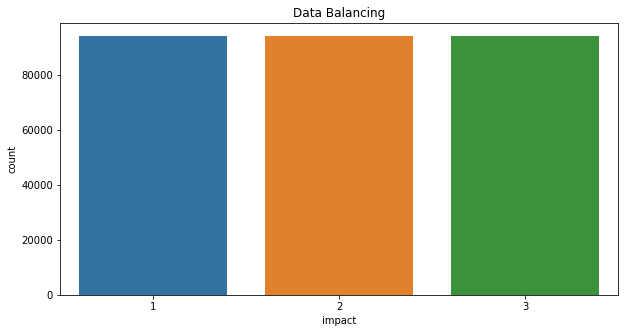

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(y_train_smote)
plt.title('Data Balancing')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_train_smote,y_train_smote)

In [52]:
classifier_sm = RandomForestClassifier()
class_model= classifier_sm.fit(X_train1,y_train1)

In [53]:
y_predict = classifier_sm.predict(X_test1)

In [54]:
print(confusion_matrix(y_test1,y_predict))

[[23537     0     0]
 [    0 23479    14]
 [    0     3 23470]]


In [55]:
print(accuracy_score(y_test1,y_predict))

0.9997588755088436


In [57]:
print(classification_report(y_test1,y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     23537
           2       1.00      1.00      1.00     23493
           3       1.00      1.00      1.00     23473

    accuracy                           1.00     70503
   macro avg       1.00      1.00      1.00     70503
weighted avg       1.00      1.00      1.00     70503



# Feature Selection

In [58]:
# feature selection using decision tree
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [59]:
feature = pd.Series(model.feature_importances_)
feature.index = X_train1.columns
feature.sort_values(ascending=False)

priority                   0.980016
urgency                    0.018738
u_symptom                  0.000193
sys_updated_by             0.000155
category                   0.000139
sys_created_at             0.000114
subcategory                0.000107
sys_mod_count              0.000105
resolved_at                0.000099
resolved_by                0.000079
closed_code                0.000055
reassignment_count         0.000046
sys_updated_at             0.000042
caller_id                  0.000023
location                   0.000023
closed_at                  0.000016
opened_at                  0.000016
assignment_group           0.000013
made_sla                   0.000010
active                     0.000007
incident_state             0.000003
knowledge                  0.000000
u_priority_confirmation    0.000000
dtype: float64

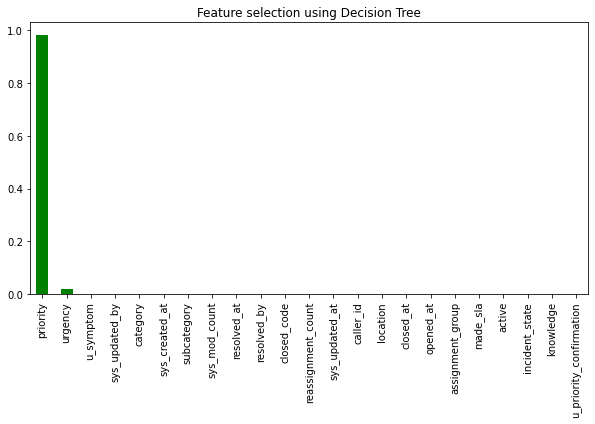

In [60]:
feature.sort_values(ascending=False).plot.bar(figsize=(10, 5),color = 'g',title = 'Feature selection using Decision Tree');

In [61]:
# feature selection using extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train1,y_train1)

ExtraTreesClassifier()

In [62]:
model.feature_importances_

array([0.01261801, 0.01525628, 0.00417015, 0.00445487, 0.00526984,
       0.00761652, 0.00656776, 0.00493156, 0.00780302, 0.02210903,
       0.00696166, 0.0082182 , 0.00578485, 0.00500777, 0.29063775,
       0.53363409, 0.00895425, 0.01361888, 0.0081564 , 0.00420013,
       0.01035655, 0.00640467, 0.00726775])

In [63]:
feature1 = pd.Series(model.feature_importances_)
feature1.index = X_train1.columns
feature1.sort_values(ascending=False)

priority                   0.533634
urgency                    0.290638
sys_updated_at             0.022109
active                     0.015256
knowledge                  0.013619
incident_state             0.012618
resolved_by                0.010357
assignment_group           0.008954
category                   0.008218
u_priority_confirmation    0.008156
sys_updated_by             0.007803
caller_id                  0.007617
closed_at                  0.007268
location                   0.006962
opened_at                  0.006568
resolved_at                0.006405
subcategory                0.005785
made_sla                   0.005270
u_symptom                  0.005008
sys_created_at             0.004932
sys_mod_count              0.004455
closed_code                0.004200
reassignment_count         0.004170
dtype: float64

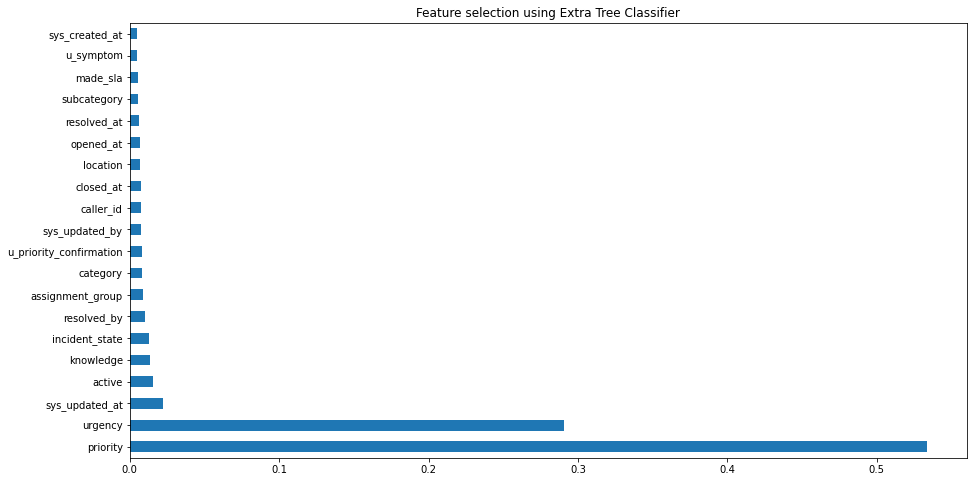

In [64]:
plt.figure(figsize=(15,8))
ranked_features=pd.Series(model.feature_importances_,index=X_train1.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.title('Feature selection using Extra Tree Classifier')
plt.show()

In [65]:
# feature selection using mutual classification
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train1, y_train1)
mutual_info

array([0.04631153, 0.02942543, 0.01287657, 0.04596039, 0.01704446,
       0.81599575, 0.04590304, 0.04392602, 0.27322351, 0.06974139,
       0.11800062, 0.17019757, 0.21837198, 0.19386327, 0.69158155,
       1.07886675, 0.2167429 , 0.031705  , 0.01875747, 0.04013253,
       0.34247649, 0.04605348, 0.04304992])

In [66]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train1.columns
mutual_info.sort_values(ascending=False)

priority                   1.078867
caller_id                  0.815996
urgency                    0.691582
resolved_by                0.342476
sys_updated_by             0.273224
subcategory                0.218372
assignment_group           0.216743
u_symptom                  0.193863
category                   0.170198
location                   0.118001
sys_updated_at             0.069741
incident_state             0.046312
resolved_at                0.046053
sys_mod_count              0.045960
opened_at                  0.045903
sys_created_at             0.043926
closed_at                  0.043050
closed_code                0.040133
knowledge                  0.031705
active                     0.029425
u_priority_confirmation    0.018757
made_sla                   0.017044
reassignment_count         0.012877
dtype: float64

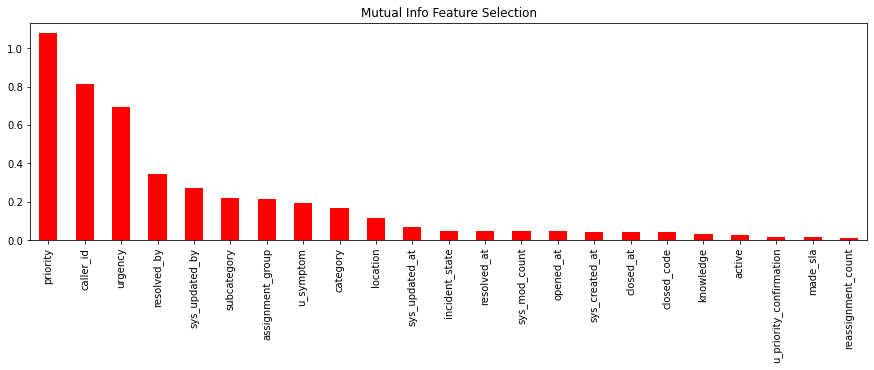

In [67]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 4),color = 'r',title = 'Mutual Info Feature Selection');

In [68]:
# feature selection using chi square
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [69]:
important_features = SelectKBest(score_func= chi2, k=23)
order_features = important_features.fit(X_train1,y_train1)

In [70]:
df_score = pd.DataFrame(order_features.scores_,columns=['Scores'])
df_columns = pd.DataFrame(X_train1.columns)

In [71]:
feature_rank = pd.concat([df_columns,df_score],axis = 1)
feature_rank

,0,Scores
0,incident_state,5.020246e+03
1,active,9.684514e+03
2,reassignment_count,1.011850e+03
3,sys_mod_count,8.158014e+04
4,made_sla,5.340417e+03
5,caller_id,2.582478e+06
6,opened_at,2.597542e+04
7,sys_created_at,4.634877e+03
8,sys_updated_by,4.219616e+05
9,sys_updated_at,2.472825e+05


In [69]:
feature_rank.sort_values(by = ['Scores'], ascending = False)

,0,Scores
5,caller_id,4.282506e+06
8,sys_updated_by,6.555855e+05
9,sys_updated_at,3.267964e+05
15,priority,1.215362e+05
3,sys_mod_count,1.120139e+05
20,resolved_by,9.465622e+04
22,closed_at,8.901912e+04
14,urgency,5.410538e+04
10,location,5.323125e+04
6,opened_at,3.103998e+04


# Model building

In [72]:
X_train2 = X_train1[['caller_id','category','sys_updated_by','resolved_by','location','sys_mod_count','closed_at','active']]
X_test2 = X_test1[['caller_id','category','sys_updated_by','resolved_by','location','sys_mod_count','closed_at','active']]

In [89]:
X_test2

,caller_id,category,sys_updated_by,resolved_by,location,sys_mod_count,closed_at,active
5692,3359,44,929,216,45,6,7,0
202980,3368,42,908,66,204,2,7,1
51705,18,37,447,108,161,2,0,0
222299,3973,9,908,53,204,7,0,0
236437,3479,55,680,143,143,3,0,0
...,...,...,...,...,...,...,...,...
230679,1195,32,908,66,143,0,41,0
53230,1322,46,777,182,204,2,0,0
163834,2529,19,44,111,96,6,7,0
167854,4304,46,609,137,93,5,7,0


In [90]:
y_test1

5692      2
202980    3
51705     2
222299    3
236437    3
         ..
230679    3
53230     2
163834    1
167854    1
242452    3
Name: impact, Length: 70503, dtype: int64

In [73]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [74]:
# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train2, y_train1)

DecisionTreeClassifier()

In [75]:
y_predict1 = dec_tree.predict(X_test2)

In [76]:
print(accuracy_score(y_test1,y_predict1))

0.9830078152702721


In [77]:
print(classification_report(y_test1,y_predict1))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99     23537
           2       0.98      0.97      0.97     23493
           3       0.98      0.99      0.99     23473

    accuracy                           0.98     70503
   macro avg       0.98      0.98      0.98     70503
weighted avg       0.98      0.98      0.98     70503



In [78]:
print(confusion_matrix(y_test1,y_predict1))

[[23351   179     7]
 [  358 22702   433]
 [   12   209 23252]]


In [79]:
# Random Forest
from sklearn.model_selection import cross_val_score

In [80]:
num_trees = 200
max_features = 4
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, n_jobs=-1)
results = cross_val_score(model, X_train2, y_train1, cv=kfold)
print(results.mean())

0.9885015052745244


In [81]:
model.fit(X_train2,y_train1)
y_pred_RF = model.predict(X_test2)

In [82]:
print(accuracy_score(y_test1,y_pred_RF))

0.9888373544388183


In [84]:
print(classification_report(y_test1,y_pred_RF))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99     23537
           2       0.98      0.99      0.98     23493
           3       0.99      0.99      0.99     23473

    accuracy                           0.99     70503
   macro avg       0.99      0.99      0.99     70503
weighted avg       0.99      0.99      0.99     70503



In [85]:
print(confusion_matrix(y_test1,y_pred_RF))

[[23283   251     3]
 [   54 23263   176]
 [    4   299 23170]]


In [86]:
import pickle

In [87]:
pickle.dump(model,open('model3.pkl','wb'))

In [92]:
model= pickle.load(open('model3.pkl','rb'))
var = model.predict([[4304,46,609,137,93,5,7,0]])
output = ""
if var[0] == 1:
    output="High"
elif var[0] == 2:
    output="Medium"
else: 
    output="Low"
print('Incident Impact is {}'.format(output))


Incident Impact is High
